# Evaluation of Model

In [33]:
import sys
import numpy as np
import pandas as pd
from itertools import cycle

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from scipy import interp
from keras.models import load_model
from keras.utils import to_categorical

sys.path.append('./src/')
import data_utils
import img_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load model and validation data

In [3]:
# load model

model = load_model('./data/models/model_v1.h5')

In [4]:
# load validation data

data_validation_pos = np.load('./data/output/data_set/data_validation_pos.npy')
data_validation_neg = np.load('./data/output/data_set/data_validation_neg.npy')

data_validation = np.concatenate((data_validation_pos, data_validation_neg), axis=0)

nb_sample, row, col = data_validation.shape
X_validation = data_validation.reshape(nb_sample, row, col, 1)
X_validation.shape

(2513, 120, 80, 1)

In [9]:
# create validation labels

label_validation_pos = np.ones((data_validation_pos.shape[0],), dtype=int)
label_validation_neg = np.zeros((data_validation_neg.shape[0],), dtype=int)
label_validation = np.concatenate((label_validation_pos, label_validation_neg), axis=0)
y_validation = to_categorical(label_validation)
y_validation

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Evaluation



In [6]:
# get model's prediction

y_pred = model.predict(X_validation)

In [37]:
# calculate true positive rate(tpr) and false positive rate(fpr) for each class 
n_classes = 2

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_validation[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_validation.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

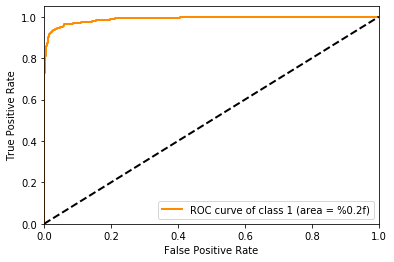

In [44]:
# Plot of a ROC curve for a specific class
class_index = 1

img_plot.plot_roc(fpr, tpr, roc_auc, 'each_class', class_index)

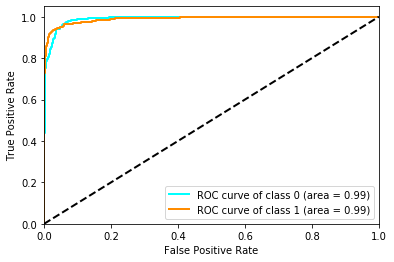

In [48]:
# Plot of a ROC curve for all classes

img_plot.plot_roc(fpr, tpr, roc_auc, 'all_classes')

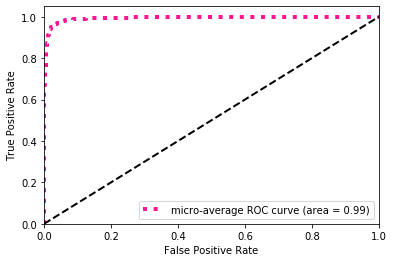

In [49]:
# Plot micro-average ROC curve

img_plot.plot_roc(fpr, tpr, roc_auc, 'micro')

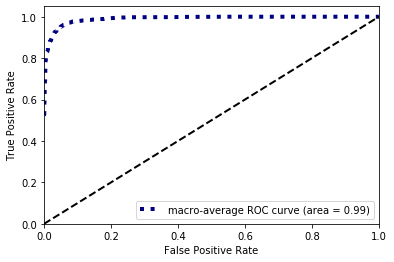

In [51]:
# Plot macro-average ROC curve

img_plot.plot_roc(fpr, tpr, roc_auc, 'macro')

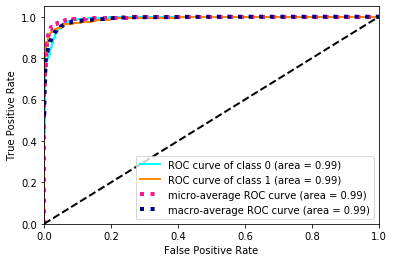

In [52]:
# Plot all ROC curve

img_plot.plot_roc(fpr, tpr, roc_auc, 'all')